---
title: TFM House Prices
date: 2022-01-29

# Put any other Academic metadata here...
---

In [21]:
!jupyter nbconvert '/content/drive/MyDrive/Python/Colab Notebooks/general.ipynb' --to markdown

[NbConvertApp] Converting notebook /content/drive/MyDrive/Python/Colab Notebooks/general.ipynb to markdown
[NbConvertApp] Support files will be in general_files/
[NbConvertApp] Making directory /content/drive/MyDrive/Python/Colab Notebooks/general_files
[NbConvertApp] Making directory /content/drive/MyDrive/Python/Colab Notebooks/general_files
[NbConvertApp] Making directory /content/drive/MyDrive/Python/Colab Notebooks/general_files
[NbConvertApp] Making directory /content/drive/MyDrive/Python/Colab Notebooks/general_files
[NbConvertApp] Making directory /content/drive/MyDrive/Python/Colab Notebooks/general_files
[NbConvertApp] Writing 6432381 bytes to /content/drive/MyDrive/Python/Colab Notebooks/general.md


## 0. Código necesario

Carga de librerías necesarias y creación de funciones para seguir correctamente el desarrollo del trabajo.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# LIBRERIAS NECESARIAS
import os # Para que nuestro trabajo sea neutro al sistema operativo utilizado
import pandas as pd # Para manejar dataframes en python
import altair as alt
#from skimpy import skim
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", palette="pastel")

In [ ]:
# FUNCION PARA CREAR GRAFICOS DE BARRAS RAPIDAMENTE
def plot_bar(dataframe, column):
    plot =alt.Chart(dataframe[[column]]).mark_bar().encode(
        x = column,
        color = column,
        y = f'count({column})'
        )
    return plot

# CREAR GRAFICOS DE PUNTOS
def plot_scatter(dataframe, column_x, column_y, column_color):
    plot =alt.Chart(dataframe).mark_circle().encode(
        x = column_x,
        y = column_y,
        color = column_color
        )
    return plot

# CREAR MATRIZ DE CORRELACIONES
def plot_matrix(dataframe, quantitative_columns, color_column):
    rows = quantitative_columns[::-1]
    plot = alt.Chart(dataframe).mark_circle().encode(
        alt.X(alt.repeat("column"), type='quantitative'),
        alt.Y(alt.repeat("row"), type='quantitative'),
        color=color_column
        ).properties(
            width=150,
            height=150
        ).repeat(
            row=rows,
            column=quantitative_columns
        ).interactive()
    return plot

# CREAR GRAFICOS DE CAJAS
def plot_box(dataframe, column1, column2, color_column, fig_dims = (16,6)):
    fig, ax = plt.subplots(figsize=fig_dims)
    # Draw a nested boxplot to show bills by day and time
    sns.boxplot(x=column1, y=column2,
            hue=color_column, palette=sns.color_palette(),
            data= dataframe)
    sns.despine(offset=10, trim=True)
    ax.tick_params(axis="x", which="both", rotation=45)
    return plt.show()


## 1. Introducción

## 2. Primera aproximación a los datos

Al descargar y descomprimir el zip correspondiente a ésta competición observamos cuatro archivos diferentes:
1. __train.csv__: El _dataset_ con el que devemos entrenar nuestro modelo.
2. __test.csv__: El _dataset_ sobre el que debemos hacer inferencia.
3. __data_description.txt__: Un archivo de texto plano con indicaciones sobre el significado de todas las variables que encontraremos en los distintos _dataset_.
4. __sample_submission__: Un ejemplo de cómo debe ser el archivo con la inferencia realizada que enviemos a _Kaggle_ para la correspondiente evaluación.


$$ \ $$


### 2.1 Descripción de los datos

Según nos viene descrito en el archivo ___data_description___, el _dataset_ está compuesto por 79 variables explicativas, y una variable dependiente (SalePrice), que es el precio de venta en dólares del inmueble, que será la variable a predecir.


Una breve explicación del significado así como el tipo, a priori, de cada variable predictora es el siguiente:
- __MSSubClass__: La clasificación del tipo de contrucción (Categórica).
- __MSZoning__: Clasificación del distrito (Categórica).
- __LotFrontage__: Longitud en pies, de la fachada, si da a la calle (Numérica). 
- __LotArea__: Tamaño del inmueble, en pies cuadrados (Numérica).
- __Street__: Tipo de calle de acceso (Categórica).
- __Alley__: Tipo de callejón de acceso (Categórica).
- __LotShape__: Forma del inmueble (Categórica).
- __LandContour__: Llanura del inmueble (Categórica).
- __Utilities__: Tipos de servicios públicos básicos disponibles (Categórica).
- __LotConfig__: Situación del inmuble dentro del edificio (si es interior, o tiene vistas a dos calles, etc.)(Categórica).
- __LandSlope__: Inclinación del terreno (Categórica).
- __Neighborhood__: Barrio donde se encuentra (Categórica).
- __Condition1__: Proximidad a avenida principal o a ferrocarril (Categórica).
- __Condition2__: Proximidad a avenida principal o a ferrocarril en caso de existir más de una (Categórica).
- __BldgType__: Tipo de inmueble (Categórica).
- __HouseStyle__: Estilo de inmueble (Categórica).
- __OverallQual__ : Calidad general de materiales y acabados (Numérica).
- __OverallCond__: Valoración general del estado del inmueble (Numérica).
- __YearBuilt__: Año de construcción (Numérica).
- __YearRemodAdd__: Año de la remodelación, si existiese (Numérica).
- __RoofStyle__: Estilo de contrucción del tejado (Categórica).
- __RoofMatl__: Material de contrucción del tejado (Categórica).
- __Exterior1st__: Material exterior (Categórica).
- __Exterior2nd__: Material exterior en caso de existir más de uno (Categórica).
- __MasVnrType__: Tipo de manpostería (Categórica).
- __MasVnrArea__: Dimensiones de la mamposteria en pies cuadrados (Numérica).
- __ExterQual__: Calidad del material exterior (Categórica).
- __ExterCond__: Estado de conservación del material exterior (Categórica).
- __Foundation__: Material principal utilizado en la construcción (Categórica)
- __BsmtQual__: Valoración de la altura del sótano (Categórica).
- __BsmtCond__: Estado de conservación del sótano (Categórica).
- __BsmtExposure__: Exposición a otras dependencias del sótano (Categórica).
- __BsmtFinType1__: Calidad de la parte terminada del sótano (Categórica).
- __BsmtFinSF1__: Área en pies cuadrados de la parte terminada del sótano (Numérica).
- __BsmtFinType2__: Calidad de la segunda parte terminada del sótano, si existiese (Categórica).
- __BsmtFinSF2__: Área en pies cuadrados de la segunda parte terminada del sótano (Numérica).
- __BsmtUnfSF__: Área en pies cuadrados del sótano sin terminar (Numérica).
- __TotalBsmtSF__: Área total del sótano en pies cuadrados (Numérica).
- __Heating__: Tipo de calefacción (Categórica).
- __HeatingQC__: Calidad y estado de la calefacción (Categórica).
- __CentralAir__: Aire acondicionado (Categórica).
- __Electrical__: Tipo de sistema electrico (Categórica).
- __1stFlrSF__: Pies cuadrados de la primera planta (Numérica).
- __2ndFlrSF__: Pies cuadrados de la segunda planta (Numérica).
- __LowQualFinSF__: Area terminada de baja calidad, en pies cuadrados (Numérica).
- __GrLivArea__: Superficie habitable por encima del nivel del suelo, en pies cuadrados (Numérica).
- __BsmtFullBath__: Número de cuartos de baño completos en el sótano (Numérica).
- __BsmtHalfBath__: Número de servicios en el sótano (Numérica).
- __FullBath__: Cuartos de baños sin contar el sótano (Numérica).
- __HalfBath__: Servicios sin contar el sótano (Numérica).
- __Bedroom__: Número de cuartos sin contar el sótano (Numérica).
- __Kitchen__: Número de cocinas (Numérica).
- __KitchenQual__: Calidad de las cocinas (Categórica).
- __TotRmsAbvGrd__: Numero de dependencias, sin contar los baños y el sótano (Numérica).
- __Functional__: Valoración de la funcionalidad de la vivienda (Categórica).
- __Fireplaces__: Número de chimeneas (Numérica).
- __FireplaceQu__: Calidad de las chimeneas (Categórica).
- __GarageType__: Lugar del garáge dentro de la construcción (Categórica).
- __GarageYrBlt__: Año de construcción del garaje (Numérica).
- __GarageFinish__: Tipo de terminación del garaje (Categórica).
- __GarageCars__: Tamaño del garaje, en coche (Numérica).
- __GarageArea__: Tamaño del garaje, en pies cuadrados (Numérica).
- __GarageQual__: Calidad del garaje (Categórica).
- __GarageCond__: Valoración del estado del garaje (Categórica).
- __PavedDrive__: Pavimentación del acceso al garaje (Categórica).
- __WoodDeckSF__: Area de plataforma de madera, en pies cuadrados (Numérica).
- __OpenPorchSF__: Area de porche abierto, en pies cuadrados (Numérica).
- __EnclosedPorch__: Area de porche cerrado, en pies cuadrados (Numérica).
- __3SsnPorch__: Area de porche _tres estaciones_, en pies cuadrados (Numérica).
- __ScreenPorch__: Area de porche con mosquitero, en pies cuadrados (Numérica).
- __PoolArea__: Area de la piscina, en pies cuadrados (Numérica).
- __PoolQC__: Calidad de la piscina (Categórica).
- __Fence__: Calidad de verja (Categórica).
- __MiscFeature__: Otras características no incluidas en categorías anteriores (Categórica).
- __MiscVal__: Valoración, en dólares, de otras características no incluidas en categorías anteriores (Numérica).
- __MoSold__: Mes de venta (Numérica).
- __YrSold__: Año de venta (Numérica).
- __SaleType__: Tipo de venta (Categórica).
- __SaleCondition__: Condición de venta (Categórica).

### 2.2 Carga de datos

Ahora procederemos a cargar los datos con la librería ___pandas___ y comprobaremos si se ha reconocido correctamente el tipo de cada una de las variables. Cargaremos unicamente el _dataset_ de entrenamiento, pues si esto fuese un caso real no dispondriamos de los datos de evaluación, por lo que para nuestro trabajo prescindiremos de ellos hasta última hora.

In [ ]:
#file_dir = "data" # Carpeta contenedora de los datos
#train = "train.csv" # Nombre del archivo de entrenamiento

# --------------------------------------------------------------------
#directory_train = os.path.join(file_dir, train) # ruta a train.csv

df = pd.read_csv('/content/drive/MyDrive/Python/HOUSE_PRICES/data/train.csv') # cargar de train.csv

df.shape

(1460, 81)

Vemos que tenemos un _dataframe_ con 1460 observaciones y 81 columnas. Hemos comentado que teniamos 79 variables predictoras y una variable objetivo, por lo que tenemos una columna de más. Realizaremos un _head_, que es un método de _python_ que nos devuelve las cinco primeras observaciones.

In [ ]:
df.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

Vemos que tenemos una columna llamada __Id__ que nos da la información del número de observación. Estableceremos esta columna como _index_ de nuestro _dataframe_ para que sea más comodo llamar a alguna observavión concreta.

In [ ]:
df.set_index('Id', 
             inplace = True, # Para que los cambios se realicen sobre el mismo objeto df
             verify_integrity = True) 

Ahora realizaremos un _tail_, que es un método que nos devuelve las cinco últimas observaciones.

In [ ]:
df.tail()

MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition SalePrice
Id                                      ...                                  
1456          60       RL         62.0  ...        WD        Normal    175000
1457          20       RL         85.0  ...        WD        Normal    210000
1458          70       RL         66.0  ...        WD        Normal    266500
1459          20       RL         68.0  ...        WD        Normal    142125
1460          20       RL         75.0  ...        WD        Normal    147500

[5 rows x 80 columns]

Una vez realizada la carga con exito, comprobaremos que las columnas se han reconocido correctamente. Para ello, le pediremos a _pandas_ que nos devuelva el tipo de cada columna.

In [ ]:
print(df.dtypes.to_markdown()) # Usamos to_markdown para que se nos muestren todas las observaciones

|               | 0       |
|:--------------|:--------|
| MSSubClass    | int64   |
| MSZoning      | object  |
| LotFrontage   | float64 |
| LotArea       | int64   |
| Street        | object  |
| Alley         | object  |
| LotShape      | object  |
| LandContour   | object  |
| Utilities     | object  |
| LotConfig     | object  |
| LandSlope     | object  |
| Neighborhood  | object  |
| Condition1    | object  |
| Condition2    | object  |
| BldgType      | object  |
| HouseStyle    | object  |
| OverallQual   | int64   |
| OverallCond   | int64   |
| YearBuilt     | int64   |
| YearRemodAdd  | int64   |
| RoofStyle     | object  |
| RoofMatl      | object  |
| Exterior1st   | object  |
| Exterior2nd   | object  |
| MasVnrType    | object  |
| MasVnrArea    | float64 |
| ExterQual     | object  |
| ExterCond     | object  |
| Foundation    | object  |
| BsmtQual      | object  |
| BsmtCond      | object  |
| BsmtExposure  | object  |
| BsmtFinType1  | object  |
| BsmtFinSF1    | in

Como podemos comprobar, hay una que se han reconocido como numérica cuando en realidad es categórica. Se trata de _MSSubClass_, que con valores numéricos lo que en realidad está reflejando son categorías que en ningún caso tienen ni orden ni valor numérico alguno:

- 20: 1-STORY 1946 & NEWER ALL STYLES
- 30: 1-STORY 1945 & OLDER
- 40: 1-STORY W/FINISHED ATTIC ALL AGES
- 45: 1-1/2 STORY - UNFINISHED ALL AGES
- 50: 1-1/2 STORY FINISHED ALL AGES
- 60: 2-STORY 1946 & NEWER
- 70: 2-STORY 1945 & OLDER
- 75: 2-1/2 STORY ALL AGES
- 80: SPLIT OR MULTI-LEVEL
- 85: SPLIT FOYER
- 90: DUPLEX - ALL STYLES AND AGES
- 120: 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
- 150: 1-1/2 STORY PUD - ALL AGES
- 160: 2-STORY PUD - 1946 & NEWER
- 180: PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
- 190: 2 FAMILY CONVERSION - ALL STYLES AND AGES

Así, antes de continuar y meternos de lleno en el estudio y la _ingeniería de atributos_, actualizaremos el _type_ para dicha variable.

In [ ]:
df['MSSubClass'] = df['MSSubClass'].astype(object)
df['MSSubClass'].dtype

dtype('O')

Por último, actualizaremos todas la variables tipo _object_ para que __pandas__ las reconozca como categoricas.

In [ ]:
for col in df.columns:
    if df[col].dtype == "O":
        df[col] = df[col].astype('category')

Una vez más, comprobamos que tenemos bien cardadas distintas variables.

In [ ]:
print(df.dtypes.to_markdown()) # Usamos to_markdown para que se nos muestren todas las observaciones

|               | 0        |
|:--------------|:---------|
| MSSubClass    | category |
| MSZoning      | category |
| LotFrontage   | float64  |
| LotArea       | int64    |
| Street        | category |
| Alley         | category |
| LotShape      | category |
| LandContour   | category |
| Utilities     | category |
| LotConfig     | category |
| LandSlope     | category |
| Neighborhood  | category |
| Condition1    | category |
| Condition2    | category |
| BldgType      | category |
| HouseStyle    | category |
| OverallQual   | int64    |
| OverallCond   | int64    |
| YearBuilt     | int64    |
| YearRemodAdd  | int64    |
| RoofStyle     | category |
| RoofMatl      | category |
| Exterior1st   | category |
| Exterior2nd   | category |
| MasVnrType    | category |
| MasVnrArea    | float64  |
| ExterQual     | category |
| ExterCond     | category |
| Foundation    | category |
| BsmtQual      | category |
| BsmtCond      | category |
| BsmtExposure  | category |
| BsmtFinType1

##### 2.3 Vista general de la integridad de los datos

La librería ___pandas___ nos proporciona la función _describe_ muy útil para hacernos una idea general de nuestros datos.

In [ ]:
df.describe()

LotFrontage        LotArea  ...       YrSold      SalePrice
count  1201.000000    1460.000000  ...  1460.000000    1460.000000
mean     70.049958   10516.828082  ...  2007.815753  180921.195890
std      24.284752    9981.264932  ...     1.328095   79442.502883
min      21.000000    1300.000000  ...  2006.000000   34900.000000
25%      59.000000    7553.500000  ...  2007.000000  129975.000000
50%      69.000000    9478.500000  ...  2008.000000  163000.000000
75%      80.000000   11601.500000  ...  2009.000000  214000.000000
max     313.000000  215245.000000  ...  2010.000000  755000.000000

[8 rows x 36 columns]

Como podemos observar, nos muestra la información de las variables numéricas. Podemos decirle que nos muestre los mismos resultados para las variables categóricas.

In [ ]:
df.describe(include='category')

MSSubClass MSZoning Street  ... MiscFeature SaleType SaleCondition
count         1460     1460   1460  ...          54     1460          1460
unique          15        5      2  ...           4        9             6
top             20       RL   Pave  ...        Shed       WD        Normal
freq           536     1151   1454  ...          49     1267          1198

[4 rows x 44 columns]

A traves de la función _describe_ podemos comprobar que tenemos variables con valores faltantes en la columns _count_, vemos tambien que hay variables con valores extremos en la columna _max_ que deberemos tratar, así como variables    que toman el valor 0 y que se deberían observar en más detalle.


$$ \ $$

## 3. Análisis exploratorio e ingeniería de atributos

Una vez tenemos el _dataframe_ cargado, con el tipo de las variables correctamente reconocido y con una idea general de las estadística básicas, procedemos al estudio de cada variables por separado, así como a las tranformaciones necesarias para conseguir un dataset en óptimas condiciones para el entrenamiento de nuestro modelo.

$$ \ $$

#### 3.1 MSSubClass

Veamos unas estadísticas básicas así como un gráfico de barras para hacernos una idea sobre los datos.

In [ ]:
df[['MSSubClass']].describe().T

count  unique  top  freq
MSSubClass   1460      15   20   536

In [ ]:
plot_bar(df, 'MSSubClass')

alt.Chart(...)

En esta primera variable vemos que no tenemos valores faltantes, pero tenemos varios problemas que hemos de intentar corregir:
- Ausencia de observaciones de la categoría 150
- Categorías con muy pocas observaciones.

$$ \ $$

Observemos los valores posibles que puede tomar esta variable:
- 20: 1-STORY 1946 & NEWER ALL STYLES
- 30: 1-STORY 1945 & OLDER
- 40: 1-STORY W/FINISHED ATTIC ALL AGES
- 45: 1-1/2 STORY - UNFINISHED ALL AGES
- 50: 1-1/2 STORY FINISHED ALL AGES
- 60: 2-STORY 1946 & NEWER
- 70: 2-STORY 1945 & OLDER
- 75: 2-1/2 STORY ALL AGES
- 80: SPLIT OR MULTI-LEVEL
- 85: SPLIT FOYER
- 90: DUPLEX - ALL STYLES AND AGES
- 120: 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
- 150: 1-1/2 STORY PUD - ALL AGES
- 160: 2-STORY PUD - 1946 & NEWER
- 180: PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
- 190: 2 FAMILY CONVERSION - ALL STYLES AND AGES

Si observamos el resto de variables disponibles podemos comprobar que esta primera variable podriamos considerarla como un resumen de otras que ya disponemos en nuestros datos, por ejemplo, podriamos considerar el juntar las categorías 20 y 30 ya que la única diferencia entre ellas es el año de construcción, para el cual ya disponemos de otra variable con ese dato y que nos diferenciaría unas muestras de las otras. Así, si agrupamos y hacemos que la variable disponga de menos valores posibles podremos hacer que ningún valor presente registros insuficientes para entrenar nuestro modelo.

Antes de agruparlas hay que mencionar que las categorías 120, 150, 160 y 180 son exactamente iguales a las categorías 20, 50, 60 y 80, con la única diferencia de que pertenencen a los denominados PUD (Planned Unit Development), que como veremos en los gráficos a continuación, hacen que el valor aumente.

In [ ]:
MSSubClass_20_120 = 'MSSubClass == [20, 120] & LotArea < 30000'
MSSubClass_60_160 = 'MSSubClass == [60, 160] & LotArea < 30000'
MSSubClass_80_180 = 'MSSubClass == [80, 180] & LotArea < 30000'

plot_20_120 = plot_scatter(df.query(MSSubClass_20_120), 'LotArea', 'SalePrice', 'MSSubClass')
plot_60_160 = plot_scatter(df.query(MSSubClass_60_160), 'LotArea', 'SalePrice', 'MSSubClass')
plot_80_180 = plot_scatter(df.query(MSSubClass_80_180), 'LotArea', 'SalePrice', 'MSSubClass')

plot_20_120 | plot_60_160 | plot_80_180

alt.HConcatChart(...)


Como vemos, para dimensiones de la vivienda parecidas las observaciones que pertenecen a la categoría _PUD_ presentan valores superiores en la variable _SalePrice_. Así, crearemos 4 categorías principales, donde agruparemos las distintas observaciones, siguiendo un criterio de parentesco y, además,  crearemos una variable ficticia que llamaremos ___PUD___, que tendra un valor 1 para aquellas observaciones con valores para _MSSubClass_ de 120, 150, 160 o 180,tomando el valor 0 para el resto. 


Nuestra variable __MSSubClass__ quedará de la siguiente manera:
- __1 STORY__: Agrupará las categorías 20, 30, 120.
- __1-1/2 STORY__: Categorías 40, 45, 50, 150.
- __2 STORY__: Categorías 60, 70, 75, 160.
- __MULTI_LEVEL__: Categorías 80, 85, 90, 180, 190.



Y la variable ___PUD___:
- 1 para 120, 150, 160 y 180
- 0 para el resto

In [ ]:
# CREACION DE LA VARIABLE PUD
df['PUD'] = 0                                               # Creamos la variable PUD con valores 0
values = [120, 150, 160, 180]                               # Valores de MSSubClass para filtrar
df.loc[df['MSSubClass'].isin(values), 'PUD'] = 1            # Ponemos PUD = 1 para la seleccion

Comprobaremos que se ha realizado correctamente

In [ ]:
df.loc[df['MSSubClass'].isin(values)].head()

MSSubClass MSZoning  LotFrontage  ...  SaleCondition SalePrice PUD
Id                                   ...                             
24        120       RM         44.0  ...         Normal    129900   1
35        120       RL         60.0  ...         Normal    277500   1
46        120       RL         61.0  ...         Normal    319900   1
57        160       FV         24.0  ...        Abnorml    172500   1
63        120       RL         44.0  ...         Normal    202500   1

[5 rows x 81 columns]

In [ ]:
df.loc[~df['MSSubClass'].isin(values)].head()

MSSubClass MSZoning  LotFrontage  ...  SaleCondition SalePrice PUD
Id                                   ...                             
1          60       RL         65.0  ...         Normal    208500   0
2          20       RL         80.0  ...         Normal    181500   0
3          60       RL         68.0  ...         Normal    223500   0
4          70       RL         60.0  ...        Abnorml    140000   0
5          60       RL         84.0  ...         Normal    250000   0

[5 rows x 81 columns]

Una vez creada la variable _PUD_, agruparemos las categorias para la variable _MSSubClass_. Hay que recordar que crearemos un modelo de ___deep learning___, por lo que le pasaremos los datos con todas las variables y el propio modelo se encargará de seleccionar las variables, así que aunque tengamos la tentación de seleccionar variables quitando aquellas que que nos dieran información repetida (como pudiera ser este caso, ya que las variables _MSSubZonig, BldgType y HouseStyle parecen contener información repetida), no lo haremos.

In [ ]:
# CAMBIO DE CATEGORIAS EN LA VARIABLE MSSUBCLASS
# Definimos las categorías
one_story = [20, 30, 120]
one_and_half_story = [40, 45, 50, 150]
two_story = [60, 70, 75, 160]
multi_level = [80, 85, 90, 180, 190]


df['MSSubClass'] = df['MSSubClass'].astype('object') # Cambiamos la vble a object para poder cambiarla

df.loc[df['MSSubClass'].isin(one_story), 'MSSubClass'] = '1_STORY'
df.loc[df['MSSubClass'].isin(one_and_half_story), 'MSSubClass'] = '1_1/2_STORY'
df.loc[df['MSSubClass'].isin(two_story), 'MSSubClass'] = '2_STORY'
df.loc[df['MSSubClass'].isin(multi_level), 'MSSubClass'] = 'MULTI_LEVEL'

df['MSSubClass'] = df['MSSubClass'].astype('category') # Volvemos a poner la vble como category

Comprobaremos que todo ha salido correctamente

In [ ]:
df.head()

MSSubClass MSZoning  LotFrontage  ...  SaleCondition SalePrice PUD
Id                                   ...                             
1     2_STORY       RL         65.0  ...         Normal    208500   0
2     1_STORY       RL         80.0  ...         Normal    181500   0
3     2_STORY       RL         68.0  ...         Normal    223500   0
4     2_STORY       RL         60.0  ...        Abnorml    140000   0
5     2_STORY       RL         84.0  ...         Normal    250000   0

[5 rows x 81 columns]

In [ ]:
plot_bar(df, 'MSSubClass') 

alt.Chart(...)

#### 3.2 MSZoning

In [ ]:
df[['MSZoning']].describe().T

count unique top  freq
MSZoning  1460      5  RL  1151

In [ ]:
plot_bar(df, 'MSZoning')

alt.Chart(...)

En esta variable nos encontramos los mismos problemas que en la anterior: pocas observaciones para algunas categorías y ausencia total para otras. Seguiremos los mismos pasos, agrupando categorías por afinidad. Para ello, realizaremos un gráfico que nos ayude a hacernos una idea de cómo se comporta el precio para cada categoría.

In [ ]:
filter_area = 'LotArea < 12000'
plot_scatter(df.query(filter_area), 'LotArea', 'SalePrice', 'MSZoning')

alt.Chart(...)

Vemos en el gráfico la categoría _FV_(Floating Village Residential) presenta mayores precio que el resto de categorías. Lo contrario ocurre con _C (all)_(Commercial), que presenta precios más bajos a igualdad de dimensiones. Por último comprobamos _RH_(Residential High Density) y _RM_(Residential Medium Density) las podriamos agrupar en una misma categoría, como se muestra en el gráfico inferior. 

In [ ]:
MSZoning_RM_RH = 'LotArea < 12000 & SalePrice < 250000 & MSZoning == ["RM", "RH"]'
plot_scatter(df.query(MSZoning_RM_RH), 'LotArea', 'SalePrice', 'MSZoning')

alt.Chart(...)

Para las categorías _A_ (Agriculture) y _I_(Industrial) no disponemos de observaciones, pero deduciremos que para ambas categorías el valor es menor, asemejandolas a la categoría _C_(Commercial). También, que la categoría _C_ se ademeja más en tamaño de las viviendas de la categoria _RL_. Por último, otra categoría para la que no tenemos observaciones es _RP_(Residential Low Density Park), pero la tomaremos como _RL_ pero consideraremos precios mayores. Así, una vez observados los datos, crearemos dos grandes categorías, que llamaremos _Cat_1_ y _Cat_2_, y que agruparán al resto de categorías de la siguiente forma:
- ___Cat_1___: _RH, RM_.
- ___Cat_2___: _RL, FV, RP, A, I, C_.

Además, como no disponemos de observaciones suficientes para entrenar el modelo para que este pueda identificar que una vivienda en una zona comercial debe valer menos que una en la zona _FV_, lo que haremos se´ra crear unas variables _Ad Hoc_ para identificar características negativas y positivas de nuestros datos. Las crearemos de la siguiente manera:
- __NEG__: Sumará 1 por cada carácterística negativa que haga vajar el precio del inmueble, en este caso, para las categorías _A, I, C_.
- __POS__: Sumará 1 por cada característica positiva que haga subir el precio del inmueble, en este caso para las categorías _FV_ y _RP_.

In [ ]:
# CREACION DE LAS VARIABLES NEG y POS
df['NEG'] = 0                                               # Creamos la vble Caracteristica Negativa con valores 0
df['POS'] = 0                                               # Creamos la vble Caracteristica Positiva con valores 0
NEG = ['C (all)', 'I', 'A']                                 # Filtramos las MSZoning negativas
df.loc[df['MSZoning'].isin(NEG), 'NEG'] = 1                 # Ponemos NEG = 1 para la seleccion

POS = ['FV', 'RP']                                          # Filtramos las MSZoning negativas
df.loc[df['MSZoning'].isin(POS), 'POS'] = 1                  # Ponemos POS = 1 para la seleccion

In [ ]:
# CAMBIO DE CATEGORIAS EN LA VARIABLE MSZONING
# ------------------------------------------------------------------------------------------------------

Cat_1 = ['RH', 'RM']                                        # Definimos una categoría

df['MSZoning'] = df['MSZoning'].astype('object')            # Cambiamos la vble a object para poder cambiarla

df.loc[~df['MSZoning'].isin(Cat_1), 'MSZoning'] = 'Cat_2'   # La que no cumpla la condicion sera Cat_2
df.loc[df['MSZoning'].isin(Cat_1), 'MSZoning'] = 'Cat_1'    # La que cumpla la condicion sera Cat_1

df['MSZoning'] = df['MSZoning'].astype('category')          # Volvemos a poner la vble como category

#### 3.3 LotFrontage

LotFrontage mide en pies la longitud de la calle frontal hacia donde tiene vistas el inmueble. Se trata pues de una variable numérica. Veamos sus estadísticas básicas.

In [ ]:
df[['LotFrontage']].describe().T

count       mean        std   min   25%   50%   75%    max
LotFrontage  1201.0  70.049958  24.284752  21.0  59.0  69.0  80.0  313.0

Podemos ver que hay valores faltantes en nuestro _dataframe_. Podemos comprobar en el siguiente gráfico que esta variable tiene una alta correlación con _LotArea_ y con _LotConfig_. Así, en vez de intentar 

In [ ]:
standard_dimentions = 'LotFrontage < 200 & LotArea < 25000'

plot_matrix(dataframe = df.query(standard_dimentions),
            quantitative_columns = ['LotArea', 'LotFrontage'],
            color_column = 'LotConfig')

Output hidden; open in https://colab.research.google.com to view.

#### 3.4 LotArea

Esta variable mide las dimensiones del inmueble en pies cuadrados. Veamos sus estadísticas básicas y un histográma para hacernos una idea general sobre la variable.

In [ ]:
df[['LotArea']].describe().T

count          mean          std  ...     50%      75%       max
LotArea  1460.0  10516.828082  9981.264932  ...  9478.5  11601.5  215245.0

[1 rows x 8 columns]

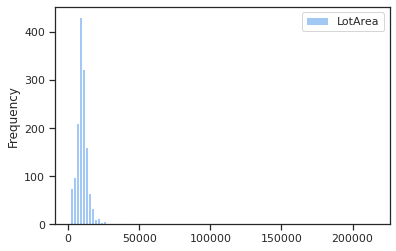

In [ ]:
df[['LotArea']].plot(kind = 'hist', bins=100)

Como podemos observar, no tenemos valores faltantes, pero si tenemos valores extremadamente altos que pueden tratarse de outliers.

In [ ]:
plot_scatter(df, 'SalePrice', 'LotArea', 'LotArea')

Output hidden; open in https://colab.research.google.com to view.

Se aprecia claramente que existen puntos que pueden ser considerados outliers, pues están claramente alejados de los valores habituales, pero si metemos en la ecuación otras variables podemos observar que no se tratan de outliers como tal, pues sus valores más bajos para las dimensiones que tienen se pueden explicar por la pertenencia a categorías que claramente hacen disminuir el precio del inmueble, por ejemplo, acceso sin pavimentar (_Street = Pave_), forma irregular del inmueble (_LotShape = IR_) o llanura de la propiedad muy irregular (_LandContour_). Veamoslo en gráficos:

##### Street

In [ ]:
plot_scatter(df, 'SalePrice', 'LotArea', 'Street')

Output hidden; open in https://colab.research.google.com to view.

##### LotShape

In [ ]:
plot_scatter(df, 'SalePrice', 'LotArea', 'LotShape')

Output hidden; open in https://colab.research.google.com to view.

##### LandContour

In [ ]:
plot_scatter(df, 'SalePrice', 'LotArea', 'LandContour')

Output hidden; open in https://colab.research.google.com to view.

Así, no trataremos los valores altos de _LotArea_ pues consideraremos que no son outliers como tal, si no que sus valores se encuentran respaldados por el valor de otras variables.

#### 3.5 Street

Nos da información sobre el tipo de via de acceso al inmuble, tomando solo los valores _Grvl_ (gravel) y _Pave_ (paved).

In [ ]:
df[['Street']].describe().T

count unique   top  freq
Street  1460      2  Pave  1454

Como vemos, no tenemos valores faltantes, pero si que tenemos pocas observaciones para la categoría _gravel_. Esto puede ser un porblema para entrenar nuestro modelo. Así, lo que haremos será sumar 1 a nuestra variable ficcitcia _NEG_ que va recogiendo categorías de distintas vatiables para las que tenemos pocas observaciones y que hacen bajar el precio, y eliminaremos esta variable del modelo.

In [ ]:
for Id in df[(df['Street'] == 'Grvl')].index:
    df.loc[Id, 'NEG'] = df.loc[Id, 'NEG'] + 1
    
# ELIMINAMOS LA VARIABLE
df.drop(['Street'], axis = 1, inplace=True)

#### 3.6 Alley

In [ ]:
df[['Alley']].describe().T

count unique   top freq
Alley    91      2  Grvl   50

In [ ]:
query = 'LotArea < 20000 & SalePrice < 400000 & Alley == ["Pave", "Grvl"]'

plot_scatter(df.query(query), 'SalePrice', 'LotArea', 'Alley')

alt.Chart(...)

Se observa que los puntos pertenecientes a _Pave_ se situan más a la derecha que los pertenecientes a _Grvl_. Para estár más seguro crearemos una gráfica más general.

In [ ]:
query = 'LotArea < 20000 & SalePrice < 400000'

plot_scatter(df.query(query), 'SalePrice', 'LotArea', 'Alley')

Output hidden; open in https://colab.research.google.com to view.

Viendo este último gráfico podemos decir que la variable _Alley_ tiene influencia en nuestros datos. Como tambien tenemos pocos valores para entrenar nuestro modelo, lo que haremos será sumar 1 en la variable artificial _NEG_ cuando _Alley_ tome el valor _grvl_ y sumar el valor 1 en la variable artificial _POS_ cuando tome el valor _pave_, y así tendremos los efectos metidos en nuestro modelo y podremos prescindir de esta variable al entrenar.

In [ ]:
for Id in df[(df['Alley'] == 'Grvl')].index:
    df.loc[Id, 'NEG'] = df.loc[Id, 'NEG'] + 1

for Id in df[(df['Alley'] == 'Pave')].index:
    df.loc[Id, 'POS'] = df.loc[Id, 'POS'] + 1
    
# ELIMINAMOS LA VARIABLE
df.drop(['Alley'], axis = 1, inplace=True)

#### 3.7 LotShape

Esta variable nos da información sobre la forma del inmueble.

In [ ]:
df[['LotShape']].describe().T

count unique  top freq
LotShape  1460      4  Reg  925

In [ ]:
plot1 = plot_bar(df, 'LotShape')
plot2 = plot_scatter(df, 'SalePrice', 'LotArea', 'LotShape')

plot1 | plot2

Output hidden; open in https://colab.research.google.com to view.

Podemos ver que tenemos muy pocas observaciones para las categorías _IR2_ e _IR3_, por lo que nuevamente recurriremos a nuestras variables artificiales. En este caso lo que haremos será reunir las categorías con pocas observaciones con la categoría _IR1_ pero además seumaremos 1 en la variable _NEG_ cuando tome el valor _IR2_, y sumaremos 2 cuando tome el valor _IR3_.

In [ ]:
# SUMAMOS PUNTOS NEGATIVOS
for Id in df[(df['LotShape'] == 'IR2')].index:
    df.loc[Id, 'NEG'] = df.loc[Id, 'NEG'] + 1

for Id in df[(df['LotShape'] == 'IR3')].index:
    df.loc[Id, 'NEG'] = df.loc[Id, 'NEG'] + 2

In [ ]:
# REAGRUPAMOS LAS CATEGORIAS
shapes = ['IR2', 'IR3']
df.loc[df['LotShape'].isin(shapes), 'LotShape'] = 'IR1'

#### 3.8 LandContour

Esta variable informa sobre la situación del terreno, y puede tomar los valores _Lvl (Situación plana), Bnk (Banked - Existe inclinación desde la calle a la entrada del inmueble), HLS (Hillside - Se encuentra en una ladera) y Low (Depresión), estando ordenados de mejor a peor. Veamos sus estadísticas básicas:

In [ ]:
df[['LandContour']].describe().T

count unique  top  freq
LandContour  1460      4  Lvl  1311

In [ ]:
plot1 = plot_bar(df, 'LandContour')
plot2 = plot_scatter(df, 'SalePrice', 'LotArea', 'LandContour')

plot1 | plot2

Output hidden; open in https://colab.research.google.com to view.

Seguiremos los pasos de la variable anterior, agrupando todas las categorías con pocas observaciones en una sola, y añadiendo un punto negativo a nuestra variable artificial para los observaciones pertenecientes a la categoría _HSL_ y dos puntos negativos para las pertenecientes a _Low_. Así nuestro modelo sabrá cuando hay desnivel en el terreno, pero además podrá tener en cuenta cuando es más pronunciado.

In [ ]:
# SUMAMOS PUNTOS NEGATIVOS
for Id in df[(df['LandContour'] == 'HLS')].index:
    df.loc[Id, 'NEG'] = df.loc[Id, 'NEG'] + 1

for Id in df[(df['LandContour'] == 'Low')].index:
    df.loc[Id, 'NEG'] = df.loc[Id, 'NEG'] + 2
    
# REAGRUPAMOS LAS CATEGORIAS
shapes = ['HLS', 'Low']
df.loc[df['LandContour'].isin(shapes), 'LandContour'] = 'Bnk'

#### 3.9 Utilities

Variable que informa sobre los servicios básicos de los que dispone la casa. Puede tomar los valores _AllPub (Electricidad, gas, agua y alcantarillado), NoSewr (Sin servicio de alcantarillado, uso de fosa septica), NoSeWa (Sin agua, solo electricidad y gas) y ELO (solo electricidad), estando ordenados de mejor a peor. 

##### Estadísticas básicas

In [ ]:
df[['Utilities']].describe().T

count unique     top  freq
Utilities  1460      2  AllPub  1459

In [ ]:
query = 'LotArea < 20000 & SalePrice < 400000'
plot_scatter(df.query(query), 'SalePrice', 'LotArea', 'Utilities')

Output hidden; open in https://colab.research.google.com to view.

Este caso es un poco especial, pues solo tenemos una observación distinta a _AllPub_, pero creemos que puede ser una variable muy interesante pues el carecer de ciertos servicios puede hacer que el valor de un inmueble baje significativamente. Así, lo que haremos será utilizar nuevamente la variable _NEG_ para hacer constar los perjuicioes en el precio que pueda crear esta variable, añadiendo un punto negativo para la categoría _NoSewr_,, dos para _NoSeWa_ y tres para _ELO_. Después en nuestro modelo no incluiremos esta variable.

In [ ]:
# SUMAMOS PUNTOS NEGATIVOS
for Id in df[(df['Utilities'] == 'NoSewr')].index:
    df.loc[Id, 'NEG'] = df.loc[Id, 'NEG'] + 1

for Id in df[(df['Utilities'] == 'NoSeWa')].index:
    df.loc[Id, 'NEG'] = df.loc[Id, 'NEG'] + 2
    
for Id in df[(df['Utilities'] == 'ELO')].index:
    df.loc[Id, 'NEG'] = df.loc[Id, 'NEG'] + 3
    
# ELIMINAMOS LA VARIABLE
df.drop(['Utilities'], axis = 1, inplace=True)

In [ ]:
df.loc[df['NEG'] > 3]

MSSubClass MSZoning  LotFrontage  LotArea  ... SalePrice PUD NEG POS
Id                                              ...                      
314     1_STORY    Cat_2        150.0   215245  ...    375000   0   4   0
1062    1_STORY    Cat_2        120.0    18000  ...     81000   0   4   0
1349    1_STORY    Cat_2          NaN    16196  ...    215000   0   4   0

[3 rows x 80 columns]

#### 3.10 LotConfig

Nos informa de la situación del inmueble respecto a la calle adyascente, pudiendo tomar los valores _Inside (interior), Corner (esquina), CulDSac (calle sin salida), FR2 (vistas a dos calles) y FR3 (vista a tres calles).

##### Estadísticas básicas y gráfico

In [ ]:
df[['LotConfig']].describe().T

count unique     top  freq
LotConfig  1460      5  Inside  1052

In [ ]:
query = 'LotArea < 30000'

plot1 = plot_bar(df, 'LotConfig')
plot2 = plot_scatter(df.query(query), 'SalePrice', 'LotArea', 'LotConfig')

plot1 | plot2

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
query = 'LotArea < 30000 & LotConfig != ["Corner"]'

plot_scatter(df.query(query), 'SalePrice', 'LotArea', 'LotConfig')

Output hidden; open in https://colab.research.google.com to view.

#### 3.11 LandSlope

Informa sobre la pendiente general del terreno, tomando los valores _Gtl (Gentle, moderada), Mod (Moderada) o Sev (Severa)_, nuevamente ordenadas de mejor a peor. 

##### Estadísticas básicas y gráficos

In [ ]:
df[['LandSlope']].describe().T

count unique  top  freq
LandSlope  1460      3  Gtl  1382

In [ ]:
plot1 = plot_bar(df, 'LandSlope')
plot2 = plot_scatter(df, 'SalePrice', 'LotArea', 'LandSlope')

plot1 | plot2

Output hidden; open in https://colab.research.google.com to view.

Podemos comprobar que tenemos pocas observaciones para dos categorías de tres, por lo que tendremos problemas para entrenar nuestro modelo, así obviaremos esta variable a la hora de entrenar, pero antes modificaremos nuestra variable _NEG_ sumando 1 cuando la observación pertenezca a la categoría _Mod_, y sumando 2 en caso de que pertenezca a la categoría _Sev_ para que así recojamos la información que nos da esta variable.

In [ ]:
# SUMAMOS PUNTOS NEGATIVOS
for Id in df[(df['LandSlope'] == 'Mod')].index:
    df.loc[Id, 'NEG'] = df.loc[Id, 'NEG'] + 1
    
for Id in df[(df['LandSlope'] == 'Sev')].index:
    df.loc[Id, 'NEG'] = df.loc[Id, 'NEG'] + 2

# ELIMINAMOS LA VARIABLE
df.drop(['LandSlope'], axis = 1, inplace=True)

#### 3.12 Neighborhood

Variable categórica que informa sobre el vecindario donde se encuantra situado el inmueble.

##### Estadísticas básicas y gráficos

In [ ]:
df[['Neighborhood']].describe().T

count unique    top freq
Neighborhood  1460     25  NAmes  225

In [ ]:
query = 'LotArea < 20000 & SalePrice < 500000'
plot1 = plot_bar(df, 'Neighborhood')
plot2 = plot_scatter(df.query(query), 'SalePrice', 'LotArea', 'Neighborhood')

plot1 | plot2

Output hidden; open in https://colab.research.google.com to view.

En esta variable nos pararemos un poco más, pues el barrio donde se situa un inmueble suele ser una variable que explica buena parte del valor del mismo. Vemos que tenemos 25 barrios, y para algunos de ellos tenemos  muy pocas observaciones, por lo que nos interesaría reagrupas las categorías para hacer que sean menos y con más observaciones, para que nuestro modelo pueda entrenar mejor. Además, en el gráfico de puntos apenas podemos sacar conclusiones, por lo que habrá que que realizar otro tipo de gráficos que nos ayuden a visualizar mejor la información contenida en esta variable. 

Lo primero que haremos será crear una variable llamada _Feet_Price_ cuyo valor seá el precio del inmueble entre la dimensión del mismo, por lo que nos dará el precio por pié cuadrado. Esto nos ayudará a crear gráficos para una sola variable sin perder la información que nos aportan las variables _SalePrice_ y _LotArea_.

In [ ]:
df = df.assign(
    Feet_Value = df['SalePrice'] / df['LotArea']
)

df.head()

MSSubClass MSZoning  LotFrontage  LotArea  ... PUD NEG POS Feet_Value
Id                                            ...                       
1     2_STORY    Cat_2         65.0     8450  ...   0   0   0  24.674556
2     1_STORY    Cat_2         80.0     9600  ...   0   0   0  18.906250
3     2_STORY    Cat_2         68.0    11250  ...   0   0   0  19.866667
4     2_STORY    Cat_2         60.0     9550  ...   0   0   0  14.659686
5     2_STORY    Cat_2         84.0    14260  ...   0   0   0  17.531557

[5 rows x 80 columns]

Ahora crearemos un gráfico que nos ayude a comprender mejor la variable _Neighborhood_.

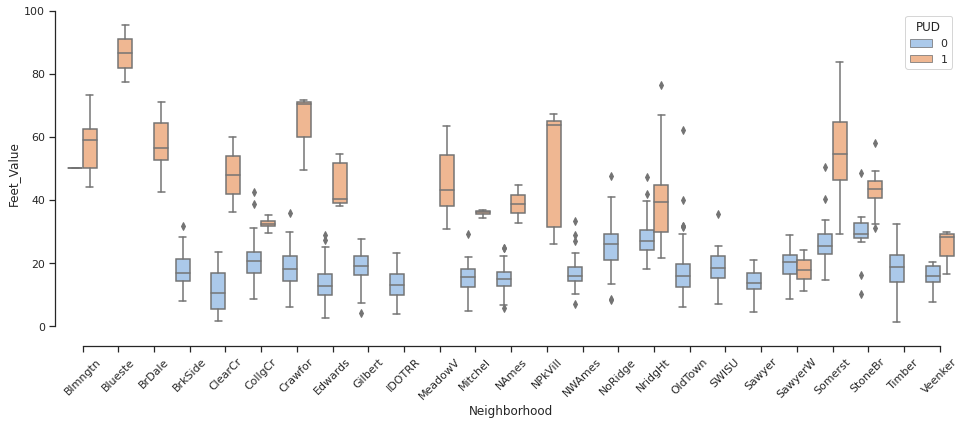

In [ ]:
plot_box(df, "Neighborhood", "Feet_Value", "PUD")

En esta gráfica podemos ver que hay barrios donde los inmuebles estan todos construidos bajo el sistema __PUD__ que comentamos en la primera variable, como son Blmnhth (aunque tiene una observación no PUD), Blueste, BrDale, MeadowV y NPkVill. Hemos separado los inmuebles por la variable _PUD_ porque es una varable que claramente hace que el valor del inmueble cambie drasticamente.

Crearemos un segundo gráfico eliminando los inmuebles pertenencientes a la categoría _PUD_ y separaremos por tipo de construcción, así nos haremos una mejor idea de cómo tratar esta variable.

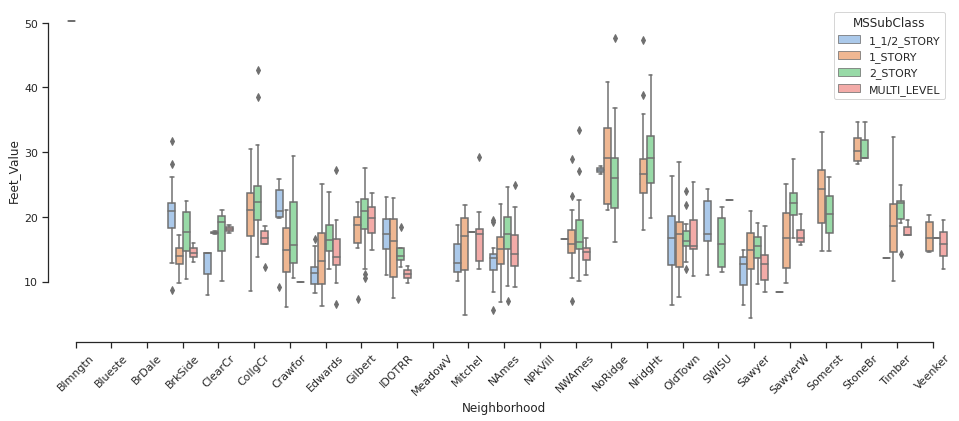

In [ ]:
query = 'NEG == 0 and POS == 0 and LandContour == "Lvl" and PUD == 0'

plot_box(df.query(query), "Neighborhood", "Feet_Value", "MSSubClass")

En el gráfico podemos apreciar lo siguiente:
1. El barrio tiene una alta influencia en el precio del inmueble.
2. Un tipo de construcción puede tener un valor promedio más alto o más bajo que otro dependiendo del barrio.
3. Existen barrios para los que algún tipo de construcción carece de muestras.

Lo que haremos será crear una nueva variable, que llamaremos _Neighborhood_Cat_, donde catalogaremos el barrio donde se encuentra situado el inmueble dependiendo del tipo de construcción, y para ello lo asignaremos a una de las siguiente categorías:
- ___very_low___: Cuando el precio medio del pié cuadrado para ese tipo de inmueble en el barrio esté por debajo de la media menos 1,5 veces la desviación estandard para ese tipo de inmueble teniendo en cuenta todos los barrios.
- ___low___: Cuando el precio medio del pié cuadrado para ese tipo de inmueble en el barrio esté en un valor comprendido entre la media menos 1,5 veces la desviación estandard y la media menos 0,5 veces la desviación estandard para ese tipo de inmueble teniendo en cuenta todos los barrios.
- ___normal___: Cuando el precio medio del pié cuadrado para ese tipo de inmueble en el barrio esté en un valor comprendido entre la media menos 0,5 veces la desviación estandard (incluido) y la media más 0,5 veces la desviación estandard para ese tipo de inmueble teniendo en cuenta todos los barrios.
- ___high___: Cuando el precio medio del pié cuadrado para ese tipo de inmueble en el barrio esté en un valor comprendido entre la media más 0,5 veces la desviación estandard (incluido) y la media más 1,5 veces la desviación estandard para ese tipo de inmueble teniendo en cuenta todos los barrios.
- ___very_high___: Cuando el precio medio del pie cuadrado para ese tipo de inmueble en el barrio esté por encima de la media más 1,5 veces la desviación estandard (incluido) para ese tipo de inmueble teniendo en cuenta todos los barrios.

Es decir, tomaremos un tipo de construcción de los detallados en la variable _MSSubClass_, realizaremos la media para todos los barrios diferenciando entre construcciones PUD y no PUD, hayaremos también la desviación estandard. Una vez tengamos estos dos valores, crearemos cinco intervalos, desde menos infinito hasta la media menos 1,5 veces la desciación estandard, desde media - 1,5 * desviación estandard (incluido) hasta media - 0,5 * desviación estandard, desde media - 0,5 * desviación estandard (incluido) a media + 0,5 * desviación estandard, desde media + 0,5 * desviación estandard (incluido) a media + 1,5 * desviación estandard, y por último de media + 1,5 * desviación estandard (incluido) hasta el infinito, y una vez tengamos estos intervalos haremos la media para ese tipo de construcción para el barrio en concreto, y lo catalogaremos dependiendo del intervalo en el que se encuentre esa media.

Hay que matizar tambien que lo haremos intentando tener un prototipo de inmueble. Para ello, dejaremos fuera los inmuebles que tengan valores distintos de 0 para las variables _NEG y POS_, y que tengan valores distintos de _Lvl_ para la variable _LandContour_, pues pueden sergar mucho las medias. Esto lo realizaremos siempre que podamos, prescindiendo de llo si quitando esas observaciones nos quedasemos sin inmuebles para realizar los calculos para un determinado barrio o tipo de construcción. Además señalar que todo esto lo haremos diferenciando entre construcciones tipo PUD y no PUD, pues hemos comprobado que el comportamiento en el precio varia considerablemente si tenemos en cuenta esta variable.

In [ ]:
# Creamos un dataframe donde almacenaremos las categorias asignadas segun los criterios
# Esto nos ayudara a catalogar los datos de test
neighborhoor_dictionary = {'MSSubClass': 'MSSubClass', 
                           'PUD': 0, 
                           'Neighborhood': 'Neighborhood', 
                           'Neighborhood_Cat': 'None'}
df_neighborhoor = pd.DataFrame(neighborhoor_dictionary, index=[0])


# Creacion de la nueva variable Neighborhood_Cat----------------------------------------------------------------
for mssubclass in df['MSSubClass'].unique(): # Para cada tipo de construccion
    for pud in [0,1]: # Para cada valor de pud
        
        # MEDIA Y DESVIACION ESTANDARD GENERAL PARA EL TIPO DE CONSTRUCCION ####################################
        # Creamos la consulta
        query = f'NEG == 0 and POS == 0 and LandContour == "Lvl" and \
            MSSubClass == "{mssubclass}" and PUD == {pud}'
            
        gmean = df.query(query)['Feet_Value'].mean() # Media general por tipo de construccion y pud (restringido)
        gstd = df.query(query)['Feet_Value'].std() # Desv. estandard por tipo de construccion y pud (restringido)
        
        
        # En caso de que la query anterior genere NaN ------------------------------------------------------
        # Bajamos las exigencias quitando el NEG == 0, POS == 0 y LandContour == Lvl
        if pd.isna(gmean):
            print('Control point 1', mssubclass, pud)
            query = f'MSSubClass == "{mssubclass}" and PUD == {pud}'
            gmean = df.query(query)['Feet_Value'].mean() # Media general por tipo de construccion y pud
            gstd = df.query(query)['Feet_Value'].std() # Desviacion estandard general por tipo de construccion y pud
            
             # En caso de que la query anterior siga generando NaN -----------------------------------------
            # Bajamos las exigencias dejando solo el MSSubClass
            if pd.isna(gmean):
                print('Control point 2')
                query = f'MSSubClass == "{mssubclass}"'
                gmean = df.query(query)['Feet_Value'].mean() # Media general por tipo de construccion
                gstd = df.query(query)['Feet_Value'].std() # Desviacion estandard general por tipo de construccion
                if pd.isna(gmean):
                    print('Error')
        # --------------------------------------------------------------------------------------------------
        
        # MEDIA POR BARRIO ######################################################################################  
        for neighborhood in df['Neighborhood'].unique():
            
            query2 = f'NEG == 0 and POS == 0 and LandContour == "Lvl" and \
                MSSubClass == "{mssubclass}" and PUD == {pud} and Neighborhood == "{neighborhood}"'
            nmean = df.query(query2)['Feet_Value'].mean() # Media para el barrio
            
            # En caso de que el query genere NaN -----------------------------------------------------------
            if pd.isna(nmean): 
                query3 = f'MSSubClass == "{mssubclass}" and PUD == {pud} and Neighborhood == "{neighborhood}"'
                nmean = df.query(query3)['Feet_Value'].mean()
            # ----------------------------------------------------------------------------------------------
                
            # CATALOGAMOS LA MEDIA EN LOS INTERVALOS   
            if nmean < (gmean - (1.4 * gstd)):
                category = 'very_low'
            elif (gmean - (1.5 * gstd)) <= nmean < (gmean - (0.5 * gstd)):
                category = 'low'
            elif (gmean - (0.5 * gstd)) <= nmean < (gmean + (0.5 * gstd)):
                category = 'normal'
            elif (gmean + (0.5 * gstd)) <= nmean < (gmean + (1.5 * gstd)):
                category = 'high'
            elif (gmean + (1.5 * gstd)) <= nmean :
                category = 'very_high'
            else:
                category = 'None'
            
            # Guardamos el valor para la nueva variable Neighborhood_Cat
            df.loc[(df['Neighborhood'] == neighborhood) &
                   (df['MSSubClass'] == mssubclass) &
                   (df['PUD'] == pud),
                   'Neighborhood_Cat'] = category
            
            # ACTUALIZAMOS DICCIONARIO QUE USAREMOS CON LOS DATOS DE TEST
            new_row = {'MSSubClass': mssubclass, 'PUD': pud, 'Neighborhood': neighborhood, 'Neighborhood_Cat': category}
            df_neighborhoor = df_neighborhoor.append(new_row, ignore_index=True)

Control point 1 1_1/2_STORY 1
Control point 2


In [ ]:
df.Neighborhood_Cat.describe()

count       1460
unique         5
top       normal
freq         812
Name: Neighborhood_Cat, dtype: object

In [ ]:
plot_bar(df, 'Neighborhood_Cat')

alt.Chart(...)

Vemos que nuestros datos se han catalogado correctamente, pero volvemnos a tener pocas observaciones para las categorías _very_high_ y para _very_low_. Así, lo que haremos será unir estas dos categorias con las categorías _high_ y _low_ respectivamente pero antes añadiremos el valor 1 a nuestras ya famosas variables artificiales _POS y NEG_ para recoger la información que esas dos categorías nos dan.

In [ ]:
# SUMAMOS PUNTOS POSITIVOS Y NEGATIVOS
for Id in df[(df['Neighborhood_Cat'] == 'very_high')].index:
    df.loc[Id, 'POS'] = df.loc[Id, 'POS'] + 1
    
for Id in df[(df['Neighborhood_Cat'] == 'very_low')].index:
    df.loc[Id, 'NEG'] = df.loc[Id, 'NEG'] + 1

In [ ]:
# REAGRUPAMOS LAS CATEGORIAS
df.loc[df['Neighborhood_Cat'] == 'very_high', 'Neighborhood_Cat'] = 'high'
df.loc[df['Neighborhood_Cat'] == 'very_low', 'Neighborhood_Cat'] = 'low'

#### 3.13 Condition1 & Condition2

Aporta información sobre la cercanía del inmueble a entronos clave de una ciudad, como puede ser una avenida principal, una estación de tren, etc. 

##### Estadísticas básicas y gráficos

In [ ]:
df[['Condition1']].describe().T

count unique   top  freq
Condition1  1460      9  Norm  1260

In [ ]:
plot_bar(df, 'Condition1')

alt.Chart(...)

In [ ]:
df[['Condition2']].describe().T

count unique   top  freq
Condition2  1460      8  Norm  1445

Podemos ver que en _Condition1_ exiten muchas categorías con pocas o muy pocas observaciones. Además, en _Condition2_ apenas hay observaciones fuera de la categoría _normal_. Veamos un gráfico de barras para ver si podemos obtener más información.

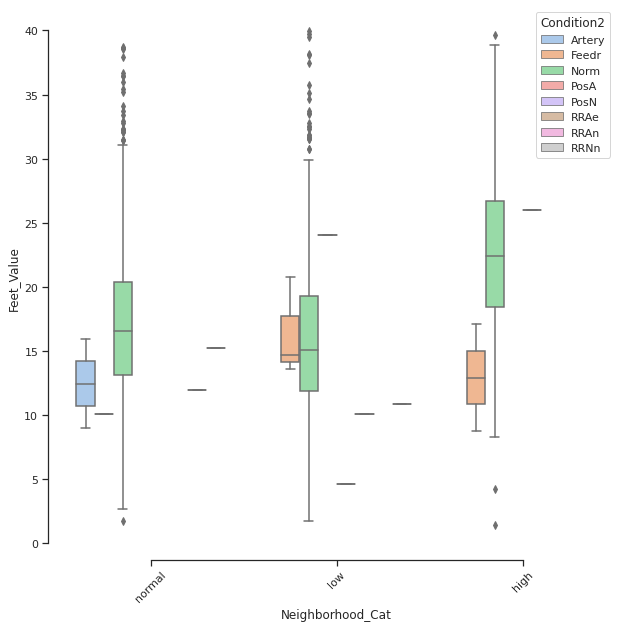

In [ ]:
query = 'Feet_Value < 40'
plot_box(df.query(query), 'Neighborhood_Cat', 'Feet_Value', 'Condition2', fig_dims=(10, 10))

Parece que, aunque no podemos sacar una conclusión clara, es como si la cercanía a entornos clave de la ciudad bajara el valor del inmueble en muchos casos. Además presentan comportamientos muy distintos, que puede ser debido a la escased de observaciones.
 Lo que haremos será reunir todas las categorías diferentes de la categoría _Normal_ en una sola categoría con valor 1, asignando el valor 0 a la categoría normal. De la variable Condition2 prescindiremos directamente.

In [ ]:
df.loc[:, 'Condition'] = 0
df.loc[df['Condition1'] != 'Norm', 'Condition'] = 1

df[['Condition']].head()

Condition
Id           
1           0
2           1
3           0
4           0
5           0

#### 3.14 BldgType

Tipo de vivienda. Variable categórica que nos informa sobre la estructura del inmueble. 

##### Estadísticas báscias y gráfico

In [ ]:
df[['BldgType']].describe().T

count unique   top  freq
BldgType  1460      5  1Fam  1220

In [ ]:
df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [ ]:
query = 'LotArea < 20000 and SalePrice < 400000'

plot1 = plot_bar(df, 'BldgType')
plot2 = plot_scatter(df.query(query), 'SalePrice', 'LotArea', 'BldgType')

plot1 | plot2

Output hidden; open in https://colab.research.google.com to view.

Vemos que nuevamente se presenta el problema de tener varia categorías con pocas observaciones. Para solucionar este problema volveremos a reagrupar catwegorías, pero para ello veremos cuales son más parecidad enrtre si. 

Podemos apreciar que las categorías _Twnhs y TwnhsE_ presentan mayores precios de venta.

In [ ]:
query = 'LotArea < 40000 and BldgType == ["TwnhsE", "Twnhs"]'

plot_scatter(df.query(query), 'SalePrice', 'LotArea', 'BldgType')

alt.Chart(...)

Para el resto de categorías debemos hacer un análisis más exaustivo, diferenciando por otro tipo de variables.

In [ ]:
query = 'LotArea < 20000 and SalePrice < 400000 and BldgType == ["1Fam", "Duplex", "2fmCon"]'

plot_scatter(df.query(query), 'SalePrice', 'LotArea', 'BldgType')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Guardamos lo barrios donde hay observaciones de las categorias objetivo
query = "BldgType == ['2fmCon', 'Duplex']"
neighborhoods = df.query(query)['Neighborhood'].unique()


query = 'LotArea < 20000 and SalePrice < 400000 and BldgType == ["1Fam", "Duplex", "2fmCon"] and Neighborhood in @neighborhoods'
plot_scatter(df.query(query), 'SalePrice', 'LotArea', 'BldgType')

alt.Chart(...)

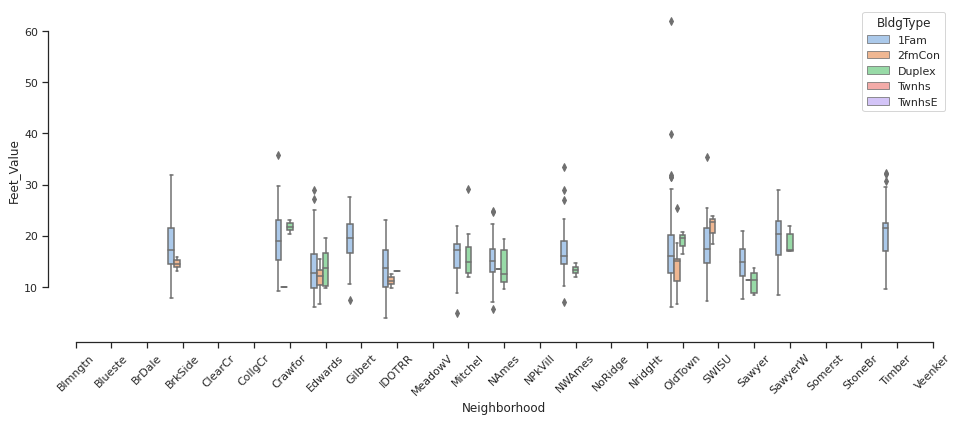

In [ ]:
plot_box(df.query(query), 'Neighborhood', 'Feet_Value', 'BldgType')

No vemos una tendencia clara en los datos, por lo que no diferenciaremos entre las categorías _1Fam, 2fmCon y Duplex_. En cambio, las caregorías _Twnhs y TwnhsE_ las uniremos en una sola categoría, añadiendo el valor 1 en la variable artificial _POS_ para las observaciones pertenecientes a la categoría _Twnhs_, ya que preewsenta un mayor precio de venta. 

In [ ]:
# Sumamos 1 en POS para las observaciones BldfType == Twnhs
for Id in df[(df['BldgType'] == 'Twnhs')].index:
    df.loc[Id, 'POS'] = df.loc[Id, 'POS'] + 1

# Unimos las categorías Twnhs y TwnhsE
df.loc[df['BldgType'] == 'TwnhsE', 'BldgType'] = 'Twnhs'

# Unimos el resto de categorias
to_unify = ['1Fam', '2fmCon', 'Duplex']
df.loc[df['BldgType'].isin(to_unify), 'BldgType'] = '1Fam'

#### 3.15 HouseStyle

Variable categórica que nos informa sobre el estilo de construcción.

##### Estadísticas básicas y gráfico

In [ ]:
df[['HouseStyle']].describe().T

count unique     top freq
HouseStyle  1460      8  1Story  726

In [ ]:
df['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [ ]:
query = 'LotArea < 40000 and SalePrice < 500000 and NEG == 0'

plot_scatter(df.query(query), 'SalePrice', 'LotArea', 'HouseStyle')

Output hidden; open in https://colab.research.google.com to view.

Una vez más volvemos a tener el problema de falta de suficientes observaciones en determinadas categorías para poder entrenar el modelo. Por ello, volveremos a agrupar categorías para conseguir menos categorías pero con más observaciones.

Parece lógico que agrupemos las categorías _1.5Fin_ y _1.5Unf_, pues entre ambas sumarían observaciones suficientes y parecen categorías análogas.

In [ ]:
query = 'LotArea < 40000 and SalePrice < 500000 and HouseStyle in ["1.5Fin", "1.5Unf"]'

plot_scatter(df.query(query), 'SalePrice', 'LotArea', 'HouseStyle')

alt.Chart(...)

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipa

In [ ]:
!jupyter nbconvert --to PDF "/content/drive/MyDrive/Python/Colab Notebooks/general.ipynb"


[NbConvertApp] Converting notebook /content/drive/MyDrive/Python/Colab Notebooks/general.ipynb to PDF
[NbConvertApp] Support files will be in general_files/
[NbConvertApp] Making directory ./general_files
[NbConvertApp] Making directory ./general_files
[NbConvertApp] Making directory ./general_files
[NbConvertApp] Making directory ./general_files
[NbConvertApp] Making directory ./general_files
[NbConvertApp] Writing 176726 bytes to ./notebook.tex
[NbConvertApp] Building PDF
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/nbconvert/nbconvertapp.py", line 338, in start
    s

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('/content/drive/MyDrive/Python/Colab Notebooks/general.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] WARNING | pattern u'/content/drive/MyDrive/Colab Notebooks//content/drive/MyDrive/Python/Colab Notebooks/general.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files

'File Download Unsuccessful. Saved in Google Drive'

In [ ]:
!jupyter nbconvert --to pdf '/content/drive/MyDrive/Python/Colab Notebooks/general.ipynb' 

[NbConvertApp] Converting notebook /content/drive/MyDrive/Python/Colab Notebooks/general.ipynb to pdf
[NbConvertApp] Support files will be in general_files/
[NbConvertApp] Making directory ./general_files
[NbConvertApp] Making directory ./general_files
[NbConvertApp] Making directory ./general_files
[NbConvertApp] Making directory ./general_files
[NbConvertApp] Making directory ./general_files
[NbConvertApp] Writing 186403 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 295894 bytes to /content/drive/MyDrive/Python/Colab Notebooks/general.pdf
